# WeatherPy
----

### Analysis

* Here is an brief view of the sampled cities, to provide an insight to the sample size on a global scale.  The data was sampled one final time on 5/3 at around 9:30 PM Eastern Time.
![Latitude Vs Longitude of Sampled Cities](output_data/LatVsLong.png?raw=true "Latitude vs Max Temperature (F)")


* It is unsurprising but very visible in the data shown below,  that as you get closer to the equator (0 Latitude) that the max temp goes up and as you get further away, north or south that the max temperature goes down.
![Latitude Vs Max Temperature (F)](output_data/LatitudeVsMaxTemp.png?raw=true "Latitude vs Max Temperature (F)")

* As seen in the below image there is very little correlation between Latitude and % Humidity.
![Latitude Vs % Humidity](output_data/LatitudeVsHumidity.png?raw=true "Latitude vs % Humidity")

* As visible in the image here there is also very little correlation between Latitude and % Cloudiness.  In fact the % Cloudiness viewed in relation to the Latitude seems to be completely random.
![Latitude Vs % Cloudiness](output_data/LatitudeVsCloudiness.png?raw=true "Latitude vs % Cloudiness")

* There is nearly no correlation between Latitude and Wind Speed shown in this image.  However it can be concluded that most of the sampled cities around or less than 10 MPH.
![Latitude Vs Wind Speed (MPH)](output_data/LatitudeVsWindSpeed.png?raw=true "Latitude vs Wind Speed (MPH)")

* In processing all of the above images I became curious.  I wanted to go one step further and see if there was any correlation between Longitude and any of these datasets.  I replaced Latitude with Longitude for all of the above charts and plotted them the same way.  A comparison between the Latitude charts and Longitude charts can be found in the readme for this git repo.
    * A brief synopsis of my findings in these comparisons, for each category there does not seem to be much correlation between the category and Longitude.  
    * This is not an overly surprising conclusion however, as the local weather is generally affected more by local Latitude than Longitude, given the rotation of the earth and the progression of a day.  This stands especially true for the local max temperature.



In [99]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [100]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [77]:
def api_call(x,y):
    return requests.get(f'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={x}&q={y}').json()

In [101]:
columns = ("City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed")
weatherdata = pd.DataFrame(columns=columns)

In [102]:
print(f"Beinning Data Retreival")
print("-"*27)

record = 1
group = 1
index = 1

for city in cities:
    response = api_call(api_key,city)
    try:
        print(f"Processing Record {record} of Set {group} | {city}")
        weatherdata.set_value(index, "City", city)
        weatherdata.set_value(index, "Cloudiness", response['clouds']['all'])
        weatherdata.set_value(index, "Country", response['sys']['country'])
        weatherdata.set_value(index, "Date", response['dt'])
        weatherdata.set_value(index, "Humidity", response['main']['humidity'])
        weatherdata.set_value(index, "Lat", response['coord']['lat'])
        weatherdata.set_value(index, "Lng", response['coord']['lon'])
        weatherdata.set_value(index, "Max Temp", response['main']['temp_max'])
        weatherdata.set_value(index, "Wind Speed", response['wind']['speed'])
        record +=1
        index +=1
        time.sleep(random.randint(1,3))
    except:
        print("City not found. Skipping...")
        record +=1
    finally:
        if record > 50:
            record = 1
            group += 1


Beinning Data Retreival
---------------------------
Processing Record 1 of Set 1 | rikitea


C:\Users\bryan\Miniconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
C:\Users\bryan\Miniconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\Users\bryan\Miniconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\bryan\Miniconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\bryan\Miniconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a 

Processing Record 2 of Set 1 | yagodnoye
Processing Record 3 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 4 of Set 1 | ondorhaan
City not found. Skipping...
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | bambous virieux
Processing Record 8 of Set 1 | xuddur
Processing Record 9 of Set 1 | luoyang
Processing Record 10 of Set 1 | huilong
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | henties bay
Processing Record 13 of Set 1 | dikson
Processing Record 14 of Set 1 | rodrigues alves
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | baykit
Processing Record 19 of Set 1 | khatanga
Processing Record 20 of Set 1 | erdenet
Processing Record 21 of Set 1 | saint-francois
Processing Record 22 of Set 1 | barrow
Processing Record 23 of Set 1 | slonim
Processing Re

Processing Record 36 of Set 4 | thai nguyen
Processing Record 37 of Set 4 | sault sainte marie
Processing Record 38 of Set 4 | ribeira grande
Processing Record 39 of Set 4 | lavrentiya
Processing Record 40 of Set 4 | oconomowoc
Processing Record 41 of Set 4 | honiara
Processing Record 42 of Set 4 | nexo
Processing Record 43 of Set 4 | hobart
Processing Record 44 of Set 4 | tuktoyaktuk
Processing Record 45 of Set 4 | dunedin
Processing Record 46 of Set 4 | teguldet
Processing Record 47 of Set 4 | tiznit
Processing Record 48 of Set 4 | upata
Processing Record 49 of Set 4 | yar-sale
Processing Record 50 of Set 4 | varhaug
Processing Record 1 of Set 5 | flin flon
Processing Record 2 of Set 5 | margate
Processing Record 3 of Set 5 | yulara
Processing Record 4 of Set 5 | paris
Processing Record 5 of Set 5 | illapel
Processing Record 6 of Set 5 | nikolskoye
Processing Record 7 of Set 5 | dayong
Processing Record 8 of Set 5 | fukue
Processing Record 9 of Set 5 | tsumeb
Processing Record 10 of 

Processing Record 27 of Set 8 | geraldton
Processing Record 28 of Set 8 | karaul
City not found. Skipping...
Processing Record 29 of Set 8 | pacific grove
Processing Record 30 of Set 8 | waddan
Processing Record 31 of Set 8 | rosario oeste
Processing Record 32 of Set 8 | huaihua
Processing Record 33 of Set 8 | san patricio
Processing Record 34 of Set 8 | hamza
Processing Record 35 of Set 8 | dandong
Processing Record 36 of Set 8 | sapao
City not found. Skipping...
Processing Record 37 of Set 8 | denizli
Processing Record 38 of Set 8 | sangre grande
Processing Record 39 of Set 8 | chuy
Processing Record 40 of Set 8 | sainte-marie
Processing Record 41 of Set 8 | suruc
Processing Record 42 of Set 8 | neepawa
Processing Record 43 of Set 8 | daru
Processing Record 44 of Set 8 | pekalongan
Processing Record 45 of Set 8 | kosino
Processing Record 46 of Set 8 | westport
Processing Record 47 of Set 8 | stornoway
City not found. Skipping...
Processing Record 48 of Set 8 | ardakan
Processing Reco

Processing Record 19 of Set 12 | darnetal
Processing Record 20 of Set 12 | fayaoue
Processing Record 21 of Set 12 | mullaitivu
City not found. Skipping...
Processing Record 22 of Set 12 | bonavista
Processing Record 23 of Set 12 | upington
Processing Record 24 of Set 12 | port hedland
Processing Record 25 of Set 12 | weinsberg
Processing Record 26 of Set 12 | evensk
Processing Record 27 of Set 12 | paracuru
Processing Record 28 of Set 12 | lakota
Processing Record 29 of Set 12 | coolum beach
Processing Record 30 of Set 12 | adre
Processing Record 31 of Set 12 | rungata
City not found. Skipping...
Processing Record 32 of Set 12 | ambunti
Processing Record 33 of Set 12 | krutikha
Processing Record 34 of Set 12 | abu dhabi
Processing Record 35 of Set 12 | pochutla
Processing Record 36 of Set 12 | nome
Processing Record 37 of Set 12 | mishelevka
Processing Record 38 of Set 12 | krasnyy chikoy
Processing Record 39 of Set 12 | havre-saint-pierre
Processing Record 40 of Set 12 | pathein
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [103]:
weatherdata.count()

City          579
Cloudiness    579
Country       579
Date          579
Humidity      579
Lat           579
Lng           579
Max Temp      579
Wind Speed    579
dtype: int64

In [104]:
weatherdata.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,rikitea,72,PF,1556934118,74,-23.12,-134.97,77.25,16.8
2,yagodnoye,26,RU,1556934122,99,62.52,149.63,32.59,2.51
3,atuona,0,PF,1556934125,79,-9.8,-139.03,83.61,17.11
4,bambous virieux,75,MU,1556933940,88,-20.34,57.76,73.4,4.7
5,xuddur,42,SO,1556934130,80,4.12,43.89,76.24,12.82


In [105]:
weatherdata.to_csv(output_data_file)

In [106]:
weatherdata

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,rikitea,72,PF,1556934118,74,-23.12,-134.97,77.25,16.8
2,yagodnoye,26,RU,1556934122,99,62.52,149.63,32.59,2.51
3,atuona,0,PF,1556934125,79,-9.8,-139.03,83.61,17.11
4,bambous virieux,75,MU,1556933940,88,-20.34,57.76,73.4,4.7
5,xuddur,42,SO,1556934130,80,4.12,43.89,76.24,12.82
6,luoyang,1,CN,1556934132,44,34.66,112.42,73.38,3.8
7,huilong,1,CN,1556934133,46,28.89,110.18,79.16,2.39
8,ushuaia,0,AR,1556931600,69,-54.81,-68.31,35.6,6.93
9,henties bay,0,NA,1556931730,95,-22.12,14.28,55,1.99
10,dikson,0,RU,1556934141,90,73.51,80.55,10.83,6.02


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

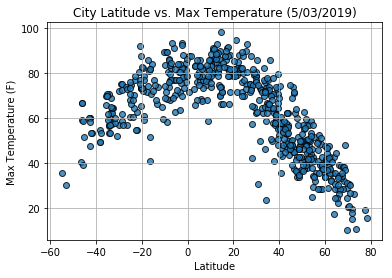

In [107]:
plt.scatter(x = weatherdata["Lat"], y=weatherdata["Max Temp"], edgecolors='black', alpha=.8)
plt.title("City Latitude vs. Max Temperature (5/03/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig('output_data/LatitudeVsMaxTemp.png', bbox_inches = 'tight')
plt.show()

#### Latitude vs. Humidity Plot

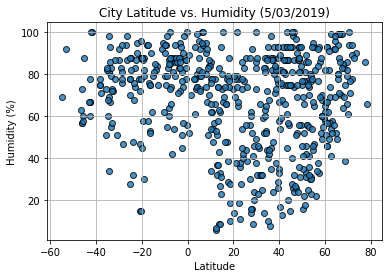

In [108]:
plt.scatter(x = weatherdata["Lat"], y=weatherdata["Humidity"], edgecolors='black', alpha=.8)
plt.title("City Latitude vs. Humidity (5/03/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig('output_data/LatitudeVsHumidity.png', bbox_inches = 'tight')
plt.show()

#### Latitude vs. Cloudiness Plot

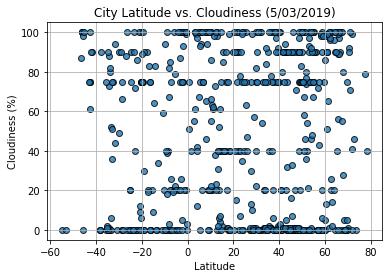

In [109]:
plt.scatter(x = weatherdata["Lat"], y=weatherdata["Cloudiness"], edgecolors='black', alpha=.8)
plt.title("City Latitude vs. Cloudiness (5/03/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig('output_data/LatitudeVsCloudiness.png', bbox_inches = 'tight')
plt.show()

#### Latitude vs. Wind Speed Plot

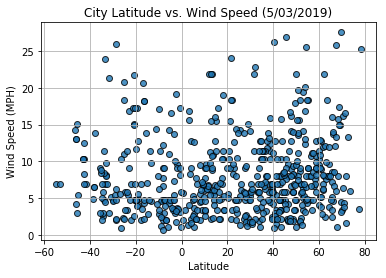

In [110]:
plt.scatter(x = weatherdata["Lat"], y=weatherdata["Wind Speed"], edgecolors='black', alpha=.8)
plt.title("City Latitude vs. Wind Speed (5/03/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid()
plt.savefig('output_data/LatitudeVsWindSpeed.png', bbox_inches = 'tight')
plt.show()

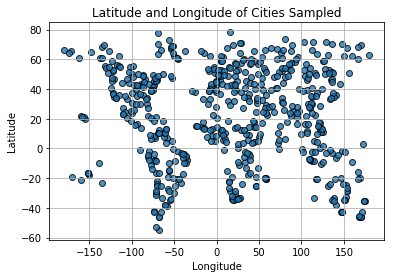

In [111]:
plt.scatter(x=weatherdata["Lng"], y = weatherdata["Lat"], edgecolors='black', alpha=.8)
plt.title("Latitude and Longitude of Cities Sampled")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.savefig('output_data/LatVsLong.png', bbox_inches = 'tight')
plt.show()

#### Morbidly curious, replacing Latitude with Longitude for all of the above scatterplots

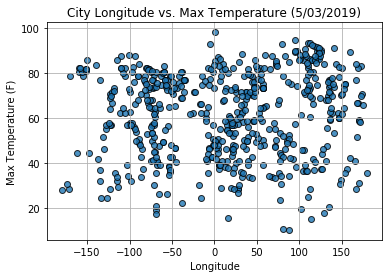

In [112]:
plt.scatter(x = weatherdata["Lng"], y=weatherdata["Max Temp"], edgecolors='black', alpha=.8)
plt.title("City Longitude vs. Max Temperature (5/03/2019)")
plt.xlabel("Longitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig('output_data/LongitudeVsMaxTemp.png', bbox_inches = 'tight')
plt.show()

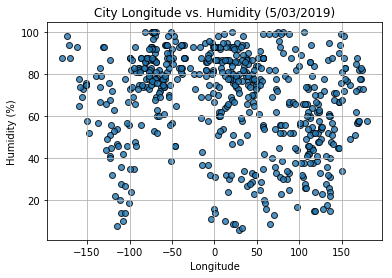

In [113]:
plt.scatter(x = weatherdata["Lng"], y=weatherdata["Humidity"], edgecolors='black', alpha=.8)
plt.title("City Longitude vs. Humidity (5/03/2019)")
plt.xlabel("Longitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig('output_data/LongitudeVsHumidity.png', bbox_inches = 'tight')
plt.show()

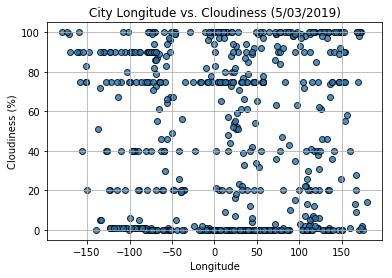

In [114]:
plt.scatter(x = weatherdata["Lng"], y=weatherdata["Cloudiness"], edgecolors='black', alpha=.8)
plt.title("City Longitude vs. Cloudiness (5/03/2019)")
plt.xlabel("Longitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig('output_data/LongitudeVsCloudiness.png', bbox_inches = 'tight')
plt.show()

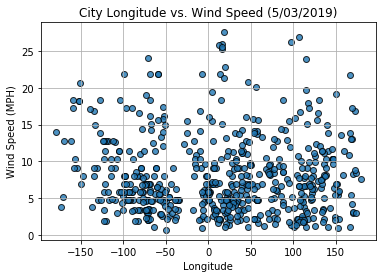

In [115]:
plt.scatter(x = weatherdata["Lng"], y=weatherdata["Wind Speed"], edgecolors='black', alpha=.8)
plt.title("City Longitude vs. Wind Speed (5/03/2019)")
plt.xlabel("Longitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid()
plt.savefig('output_data/LongitudeVsWindSpeed.png', bbox_inches = 'tight')
plt.show()